In [1]:
from os import environ
import numpy as np
import pylab as plt

In [2]:
%matplotlib inline

In [3]:
basedir = '{}/astro/papers/cs_review/figures/dlogP_dlogp'.format(environ['HOME'])

In [4]:
def read_Cell(path, ell_min, ell_max):
    """Read P_kappa file and return log_10(ell), log_10(C_ell) within ell-range
    """
    
    pk = np.loadtxt(path)
    ell  = pk[:,0]
    Cell = pk[:,1] / (ell * (ell+1) / (2 * np.pi))

    ran     = (ell>=ell_min) & (ell<=ell_max)
    
    return np.log10(ell[ran]), np.log10(Cell[ran])

In [5]:
ell_min = 10
ell_max = 1e4

### Fiducial cosmological parameters

In [38]:
s8_fid = 0.827

## Standard power spectrum

In [6]:
logell, logCell = read_Cell('{}/P_kappa'.format(basedir), ell_min, ell_max)

In [750]:
10**np.linspace(1.06122434, 4, 25)

array([   11.51395002,    15.26417463,    20.23589008,    26.82694986,
          35.56479284,    47.14865076,    62.50550308,    82.86425704,
         109.85408894,   145.63481636,   193.06973404,   255.95474445,
         339.32211867,   449.84319578,   596.36224595,   790.60421883,
        1048.11301365,  1389.49535459,  1842.06981049,  2442.05291907,
        3237.45735671,  4291.93407508,  5689.86586547,  7543.11995495,
       10000.        ])

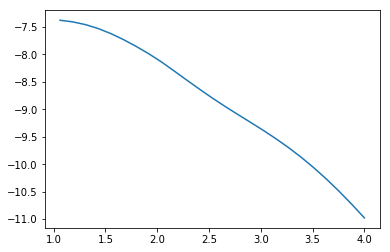

In [7]:
p = plt.plot(logell, logCell)

## Fitting functions

In [8]:
from scipy.optimize import curve_fit

In [686]:
def add(amp):
    """Return the additive constant of the quadratic function
       from the amplitude fitting parameter
       (mimics power-spectrum normalisation s8)
    """
    
    # This provides a best-fit amp=0.827, but the 10% increased
    # spectrum (0.9097) gives a best-fit of 0.925
    # Changing the prefactor of amp or lg(amp) does not help...
    c = np.log10(amp)*2 - 6.11568527 + 0.1649
    
    return c

In [687]:
def shift(tilt):
    """Return the shift parameter of the quadratic function
       from the tilt parameter (mimics matter density)
    """
    
    x0 = tilt * 1.85132114 / 0.306
    
    return x0

In [707]:
def quadratic(x, *params):
    """Used to fit quadratic function varying all three parameters
    """
    
    (amp, tilt, a) = np.array(params)
    c  = add(amp)
    x0 = shift(tilt)
    
    return c + a * (x - x0)**2

In [709]:
def quadratic_c(x, *params):
    """Used to fit quadratic function varying constant coefficient only
    """
    (amp) = np.array(params)
    c  = add(amp)
    x0 = shift(tilt_glob)
    
    return c + a_glob * (x - x0)**2

In [724]:
def quadratic_x0(x, *params):
    """Used to fit quadratic function varying shift parameter only
    """
    (tilt) = np.array(params)
    c = add(amp_glob)
    x0 = shift(tilt)
    
    return c + a_glob * (x - x0)**2

## Fitting

### Fit standard power spectrum

In [725]:
p0 = [1, 0, 0]
popt, pcov = curve_fit(quadratic, logell, logCell + logell, p0)

In [726]:
popt

array([ 0.82708472,  0.306     , -0.17586216])

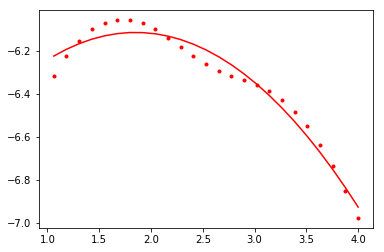

In [727]:
plot_1 = plt.plot(logell, logCell + logell, 'r.', logell, quadratic(logell, *popt), 'r-')

### Fit standard power spectrum with higher amplitude (small-scale normalization $\sigma_8$)

#### Fit by varying all coefficients

In [728]:
logell_ps, logCell_ps = read_Cell('{}/normalization+dp/P_kappa'.format(basedir), ell_min, ell_max)

In [729]:
p0 = [1, 0, 0]
popt_ps, pcov_ps = curve_fit(quadratic, logell_ps, logCell_ps + logell_ps, p0)

In [730]:
popt_ps

array([ 0.9254462 ,  0.31677232, -0.18913766])

#### Fit by only varying amplitude

In [731]:
tilt_glob, a_glob  = popt[1], popt[2]
p0  = [1]
popt_ps_A, pcov_ps_A = curve_fit(quadratic_c, logell_ps, logCell_ps + logell_ps, p0)

In [732]:
popt_ps_A

array([0.92487861])

### Fit standard power spectrum with higher matter density $\Omega_{\rm m}$ (tilt and amplitude parameter)

#### Fit by varying all parameters

In [733]:
logell_pO, logCell_pO = read_Cell('{}/Omega_m+dp/P_kappa'.format(basedir), ell_min, ell_max)

In [734]:
p0 = [1, 0, 0]
popt_pO, pcov_pO = curve_fit(quadratic, logell_pO, logCell_pO + logell_pO, p0)

In [735]:
popt_pO

array([ 0.87065394,  0.32647783, -0.19338417])

#### Fit by varying only shift parameter

In [736]:
amp_glob, a_glob  = popt[0], popt[2]
p0  = [0]
popt_pO_x0, pcov_pO_x0 = curve_fit(quadratic_x0, logell_pO, logCell_pO + logell_pO, p0)

In [737]:
popt_pO_x0

array([0.326074])

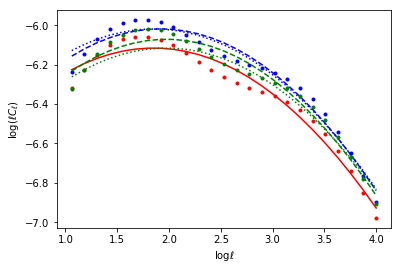

In [738]:
plot_2 = plt.plot( \
    logell, logCell + logell, 'r.', \
    logell, quadratic(logell, *popt), 'r-', \
    logell_ps, logCell_ps + logell, 'b.', \
    logell_ps, quadratic(logell_ps, *popt_ps), 'b--', \
    logell_ps, quadratic_c(logell_ps, *popt_ps_A), 'b:', \
    logell_pO, logCell_pO + logell, 'g.', \
    logell_pO, quadratic(logell_pO, *popt_pO), 'g--', \
    logell_pO, quadratic_x0(logell_pO, *popt_pO_x0), 'g:', \
)
text_x = plt.xlabel('$\log \ell$')
text_y = plt.ylabel('$\log(\ell C_\ell)$')

In [705]:
popt[0], s8_fid

(0.827084724533047, 0.827)

In [622]:
popt_ps_A / popt[0]

array([1.11823926])

In [623]:
0.9097/s8_fid

1.1